# Hypothesis Testing - 1

What is a pvalue? 
- the probability observing a value as extreme as the test statistic, assuming the null hypothesis H<sub>0</sub> is true
- How does confidence intervals relate to p.values and hypothesis testing?

Generating p-values using a simulation


In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from random import sample
from scipy.stats import bernoulli, binom, geom
import scipy.stats as stats


Question: There is a population has a p=0.06 proportion that likes spicy food. We'd like to test : what is the probability that our sample p_hat = 20%, if the null is true

In [12]:
# generate a population from which to sample from: 
p = 0.06
N_samples = 10000
population = bernoulli(p).rvs(N_samples)

H<sub>0</sub>: p = 0.06<br>
H<sub>1</sub>: p > 0.06 (one tailed) 

The p-value we want to calculate is: P( p_hat >= 0.2 | H<sub>0</sub> = True)

To calculate the p-value we can generate a simulation from the population assuming H<sub>0</sub> is true; <br>
We take 40 random samples of N=25 and calculate the p_hat for each sample. By doing so, we have created sampling distribution of the proportion.

In [13]:
def rand_sample_calc_proportion(num_samples, sample_size, population):
    mean_list = np.zeros(num_samples)
    for n in range(num_samples):
        random_sample = np.random.choice(population, size = sample_size, replace = True)
        mean_list[n] = np.mean(random_sample)
    return mean_list

In [18]:
num_samples = 40
sampling_distribution = rand_sample_calc_proportion(num_samples, 25, population)

In [19]:
sampling_distribution[:5]

array([0.08, 0.  , 0.08, 0.2 , 0.08])

Text(0, 0.5, 'Density')

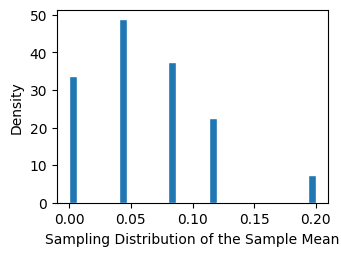

In [20]:
fig, ax = plt.subplots(figsize=(3.5, 2.5))
count, bins1, ignored = ax.hist(sampling_distribution, 30, density=True, edgecolor='white')
ax.set_xlabel('Sampling Distribution of the Sample Mean')
ax.set_ylabel('Density')

In [21]:
pvalue = (sampling_distribution >= 0.20).sum() / 40.
print(pvalue)

0.05


# Other approaches: calculating z-statistics and obtaining a pvalue 

If our sample size is known we can calculate a p-value by using the z-statistic as opposed to using simulations. In this case the sample needs to meet the assumptions for the sampling distribution, which includes:
1) Randaom - the sample is drawn randomly
2) Normal - the sample has a normal distribution with np >= 10 and n(1-p) >= 10
3) Independent - either with replacement or small enough sample (<10% of population)


In a population, we presume that the proportion of people who eat an apple a day is 0.2. However, we have a suspicion that less people eat an apple a day. We take a random sample of 65, and find that 11 people report to eating an apple. What is probability that this sample proportion is due to chance?

null: p = 0.2 <br>
alt: p<0.2

In [23]:
sample_prop = 11/65
sample_size = 65
presumed_population_prop = 0.2

z_statistic = (sample_prop - presumed_population_prop)/np.sqrt(presumed_population_prop * (1-presumed_population_prop) / sample_size)
# calculates how many standard deviations apart the sample prop and presumed_population_prop is
print(z_statistic)

-0.6201736729460422


In [27]:
# our alt. hypothesis is p < 0.2 
cdf = stats.norm.cdf(z_statistic)

In [28]:
cdf

0.2675717261988753

Since our pvalue is alpha = 0.05, we fail to reject the null hypothesis

In [29]:
1-stats.norm.cdf(1.83)

0.03362496941962834